# Lung Cancer Risk Prediction

This project which is under the ISTE Transcend'24 Hackathon on Kaggle, focuses on analyzing patient features which include Age, Smoking History, Genetic Predisposition Score, Exposure to Carcinogens, Air Pollution Index, Dietary Habits Score, Physical Activity Level, BMI (Body mass index of the individual), Family History of Lung Cancer, Income Level, and risk, to predict lung cancer risk.


In the project data outline, each patient in x_train.csv is identified by a unique ID and the reamaining columns depict a series of features that contribute to Lung Cancer risk factor of a particular patient.

The cancer risk factor score is between 0 and 100 and the factor for each patient is mapped to their corresponding ID in y_train.csv

The metric used to identify the leaderboard is the Root Mean Squared Error between the predicted and actual values

In [3]:
import pandas as pd

In [4]:
df_test = pd.read_csv('/Users/samuelattakorah/Documents/Master ML/Final Project/test.csv')
df_xtrain = pd.read_csv('/Users/samuelattakorah/Documents/Master ML/Final Project/x_train.csv')
df_ytrain = pd.read_csv('/Users/samuelattakorah/Documents/Master ML/Final Project/y_train.csv')

## Examining the Structure of the Traning Dataset (df_xtrain)

The df_xtrain file contains the training features for each patient, including Age, Smoking History, Genetic Predisposition Score, Exposure to Carcinogens, Air Pollution Index, Dietary Habits Score, Physical Activity Level, BMI, Family History of Lung Cancer and Income Level. Each row represents a unique patient identified by an ID

In [5]:
df_xtrain.head()

,Id,Age,Smoking History,Genetic Predisposition Score,Exposure to Carcinogens,Air Pollution Index,Dietary Habits Score,Physical Activity Level,BMI,Family History of Lung Cancer,Income Level
0,1,63,25,0.32,3,26,4,4,22.94,1,105904
1,2,76,48,0.85,42,77,5,1,37.23,1,40271
2,3,53,13,0.73,21,39,4,1,23.80,1,85875
3,4,39,9,0.10,35,92,2,3,22.52,1,139509
4,5,67,53,0.43,41,58,1,4,23.81,1,138469


In [6]:
df_xtrain.describe()

,Id,Age,Smoking History,Genetic Predisposition Score,Exposure to Carcinogens,Air Pollution Index,Dietary Habits Score,Physical Activity Level,BMI,Family History of Lung Cancer,Income Level
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,52.319286,29.429286,0.493950,24.696429,51.820714,5.000714,2.512857,29.085521,0.510714,85880.460000
std,404.2895,15.957912,16.802962,0.286878,14.037884,28.448265,2.539889,1.099668,6.256957,0.500064,37216.945225
min,1.0000,25.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,20057.000000
25%,350.7500,38.000000,15.000000,0.250000,13.000000,27.000000,3.000000,2.000000,23.725000,0.000000,52800.000000
50%,700.5000,52.000000,29.000000,0.500000,25.000000,54.000000,5.000000,3.000000,29.250000,1.000000,86521.000000
75%,1050.2500,66.000000,44.000000,0.740000,37.000000,77.000000,7.000000,3.000000,34.440000,1.000000,118435.000000
max,1400.0000,79.000000,59.000000,1.000000,49.000000,99.000000,9.000000,4.000000,39.980000,1.000000,149822.000000


In [7]:
df_xtrain[["Age","Smoking History", ]]

,Age,Smoking History
0,63,25
1,76,48
2,53,13
3,39,9
4,67,53
...,...,...
1395,50,41
1396,35,59
1397,62,14
1398,26,30


In [8]:
df_xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1400 non-null   int64  
 1   Age                            1400 non-null   int64  
 2   Smoking History                1400 non-null   int64  
 3   Genetic Predisposition Score   1400 non-null   float64
 4   Exposure to Carcinogens        1400 non-null   int64  
 5   Air Pollution Index            1400 non-null   int64  
 6   Dietary Habits Score           1400 non-null   int64  
 7   Physical Activity Level        1400 non-null   int64  
 8   BMI                            1400 non-null   float64
 9   Family History of Lung Cancer  1400 non-null   int64  
 10  Income Level                   1400 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 120.4 KB


In [9]:
len(df_xtrain)

1400

In [10]:
df_xtrain.isnull().sum()

Id                               0
Age                              0
Smoking History                  0
Genetic Predisposition Score     0
Exposure to Carcinogens          0
Air Pollution Index              0
Dietary Habits Score             0
Physical Activity Level          0
BMI                              0
Family History of Lung Cancer    0
Income Level                     0
dtype: int64

##  Examining the Structure of the Traning Dataset (df_ytrain)

The df_ytrain file maps each patient's ID to their Lung Cancer Risk factor, which is between 0 and 100

In [11]:
df_ytrain.head()

,Id,Risk
0,1,19.0066
1,2,67.6121
2,3,7.3692
3,4,5.0267
4,5,79.1462


In [11]:
df_ytrain.tail()

,Id,Risk
1395,1396,49.2532
1396,1397,95.9330
1397,1398,10.5895
1398,1399,26.9020
1399,1400,47.3228


In [12]:
df_ytrain.isnull().sum()

Id      0
Risk    0
dtype: int64

In [13]:
df_ytrain.dtypes

Id        int64
Risk    float64
dtype: object

In [14]:
df_ytrain.describe()

,Id,Risk
count,1400.0000,1400.000000
mean,700.5000,33.903593
std,404.2895,28.131753
min,1.0000,0.000000
25%,350.7500,9.019725
50%,700.5000,25.464750
75%,1050.2500,55.078450
max,1400.0000,99.450900


## Examining the Structure of the Test Dataset (df_test)

The test dataset matches the  x_train dataset, lacking only the target variable (Lung Cancer Risk Score) that we seek to predict

In [15]:
df_test.head()

,Id,Age,Smoking History,Genetic Predisposition Score,Exposure to Carcinogens,Air Pollution Index,Dietary Habits Score,Physical Activity Level,BMI,Family History of Lung Cancer,Income Level
0,1401,42,4,0.58,48,89,9,4,33.39,0,54062
1,1402,51,59,0.73,25,56,3,1,22.52,0,75122
2,1403,58,4,0.36,7,31,7,4,19.57,1,68431
3,1404,51,28,0.64,38,59,7,2,33.98,0,93086
4,1405,41,8,0.47,28,2,4,3,29.24,1,48205


In [16]:
df_test.describe()

,Id,Age,Smoking History,Genetic Predisposition Score,Exposure to Carcinogens,Air Pollution Index,Dietary Habits Score,Physical Activity Level,BMI,Family History of Lung Cancer,Income Level
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1475.000000,52.597315,30.255034,0.495034,26.550336,48.812081,5.281879,2.530201,28.856107,0.496644,85001.637584
std,43.156691,16.529220,16.735282,0.278295,14.860812,29.454814,2.666308,1.130397,6.556427,0.501675,37698.869788
min,1401.000000,25.000000,1.000000,0.020000,1.000000,1.000000,1.000000,1.000000,18.080000,0.000000,20620.000000
25%,1438.000000,41.000000,17.000000,0.280000,13.000000,25.000000,3.000000,2.000000,22.740000,0.000000,52314.000000
50%,1475.000000,53.000000,29.000000,0.510000,28.000000,47.000000,5.000000,3.000000,28.870000,0.000000,81465.000000
75%,1512.000000,68.000000,45.000000,0.700000,40.000000,76.000000,8.000000,4.000000,34.020000,1.000000,120510.000000
max,1549.000000,79.000000,59.000000,1.000000,49.000000,99.000000,9.000000,4.000000,39.990000,1.000000,149336.000000


# Visualizing the Data

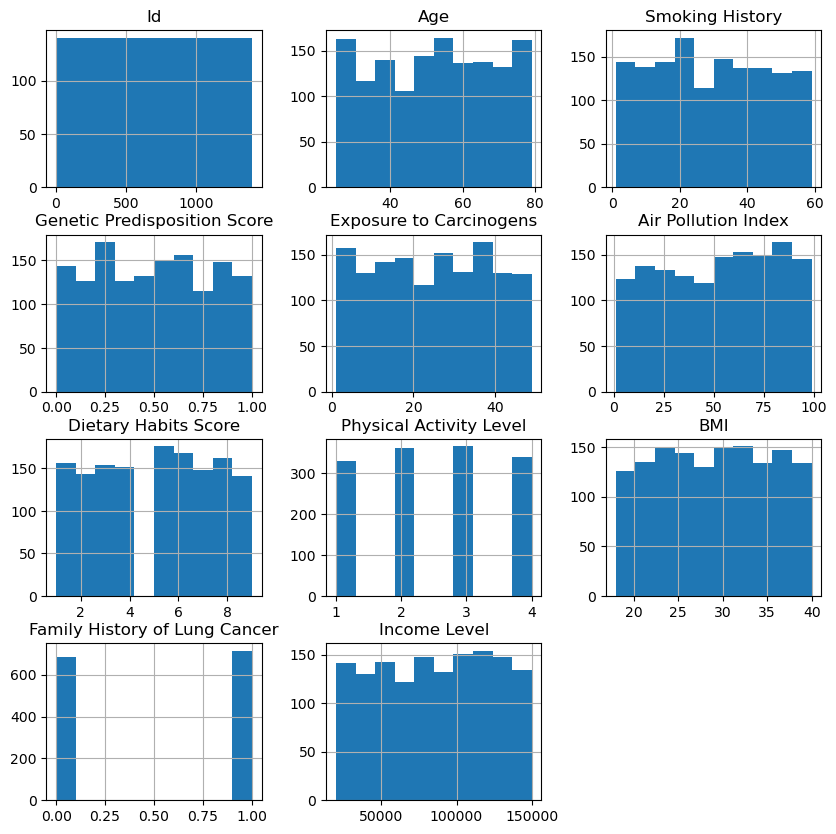

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features in x_train
df_xtrain.hist(figsize=(10, 10))
plt.show()

# Univariate Analysis

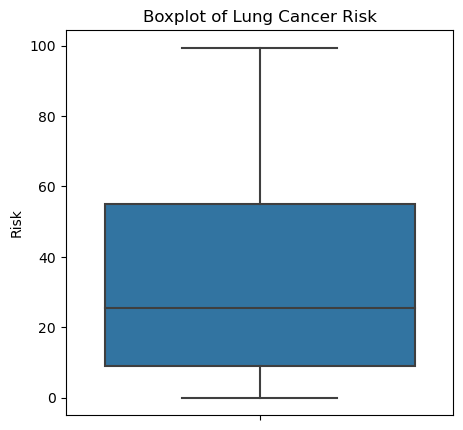

In [18]:
# Boxplot for the target variable in y_train
plt.figure(figsize=(5, 5))
sns.boxplot(y=df_ytrain['Risk'])
plt.title('Boxplot of Lung Cancer Risk')
plt.show()

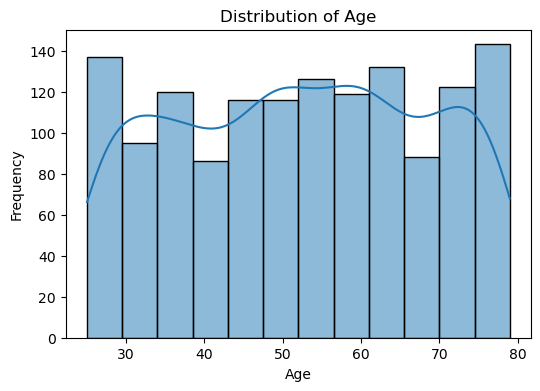

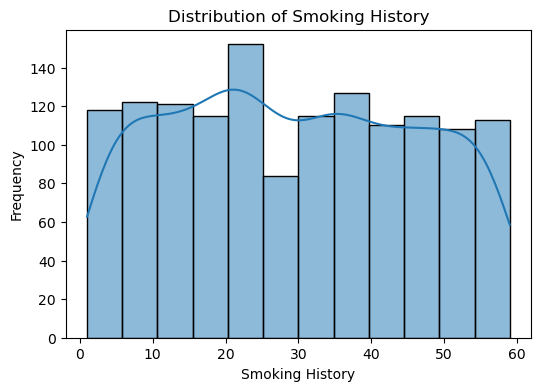

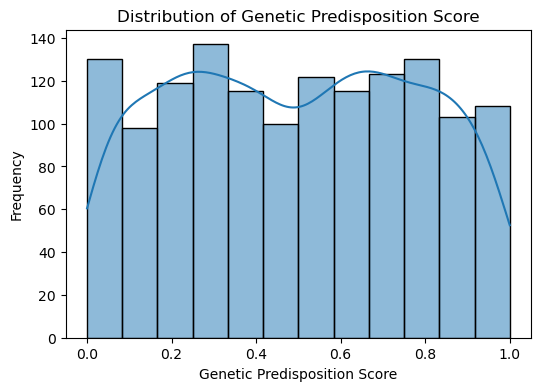

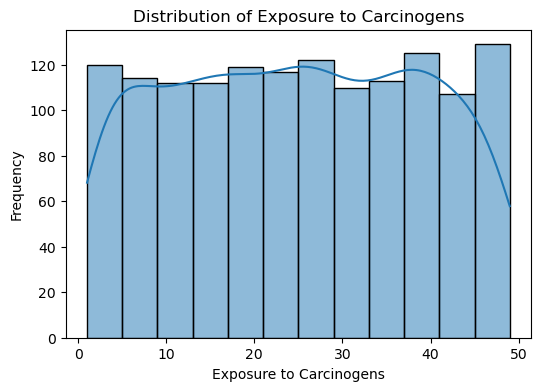

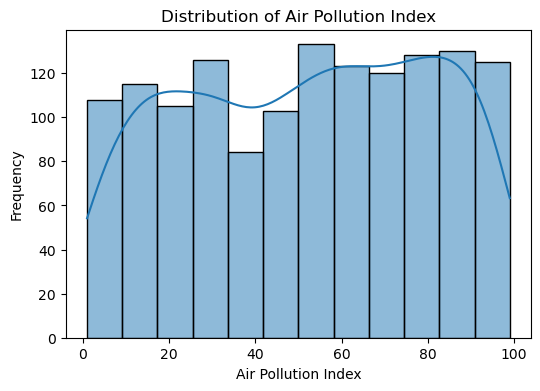

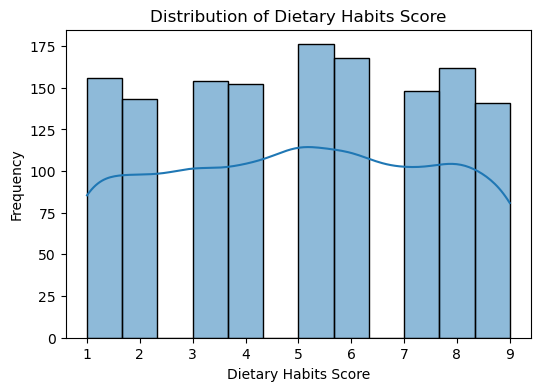

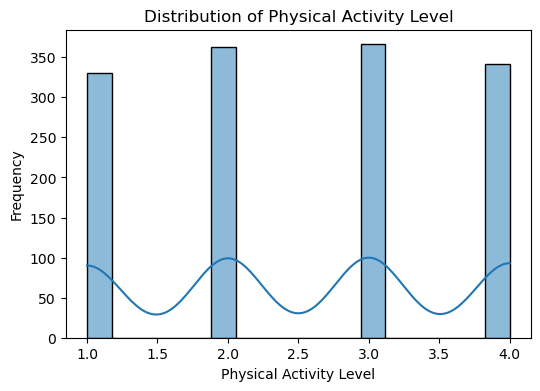

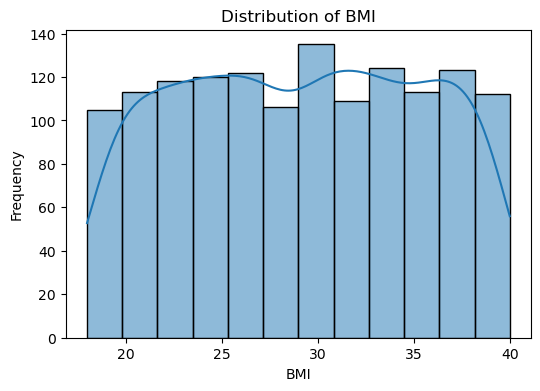

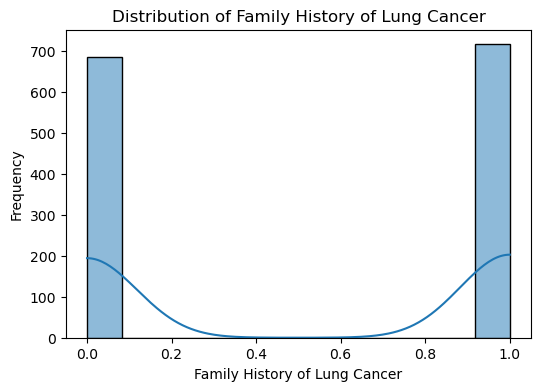

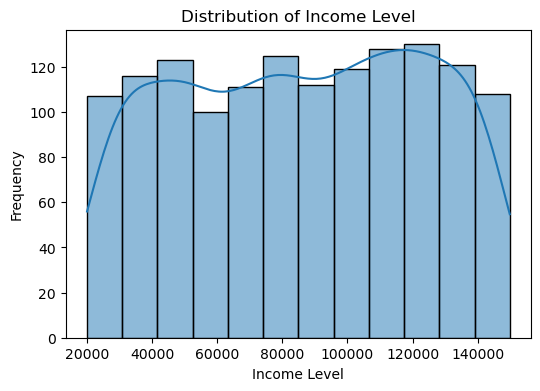

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing distributions of numerical features in x_train
for column in df_xtrain.columns[1:]:  
    plt.figure(figsize=(6, 4))
    sns.histplot(df_xtrain[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



### Summary Statistics for Numerical Features

In [20]:
# Summary statistics for numerical features
print(df_xtrain.describe())

              Id          Age  Smoking History  Genetic Predisposition Score  \
count  1400.0000  1400.000000      1400.000000                   1400.000000   
mean    700.5000    52.319286        29.429286                      0.493950   
std     404.2895    15.957912        16.802962                      0.286878   
min       1.0000    25.000000         1.000000                      0.000000   
25%     350.7500    38.000000        15.000000                      0.250000   
50%     700.5000    52.000000        29.000000                      0.500000   
75%    1050.2500    66.000000        44.000000                      0.740000   
max    1400.0000    79.000000        59.000000                      1.000000   

       Exposure to Carcinogens  Air Pollution Index  Dietary Habits Score  \
count              1400.000000          1400.000000           1400.000000   
mean                 24.696429            51.820714              5.000714   
std                  14.037884            28.448

# Bivariate Analysis

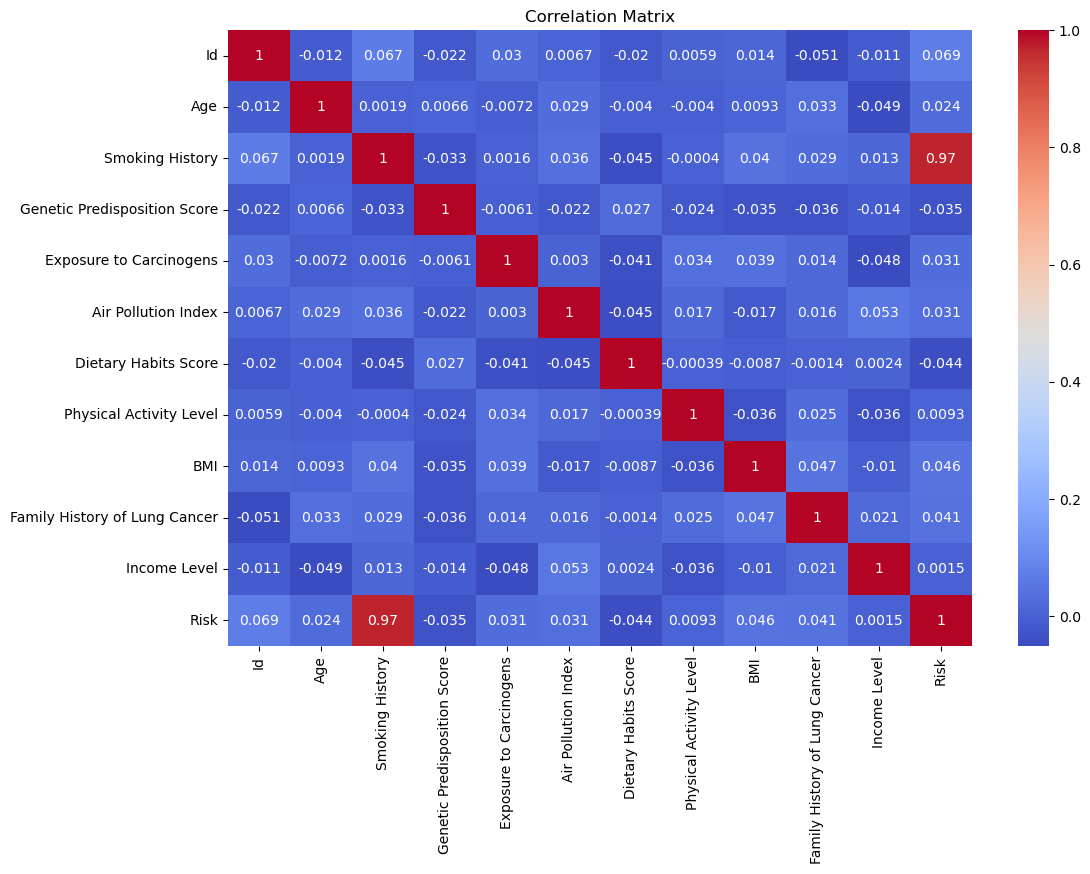

In [21]:
# Merging x_train and y_train for bivariate analysis
train_data = pd.merge(df_xtrain, df_ytrain, on='Id')

# Correlation matrix to see the relationship between variables
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### Scatter Plots for each feature against the target variable 'Risk' 

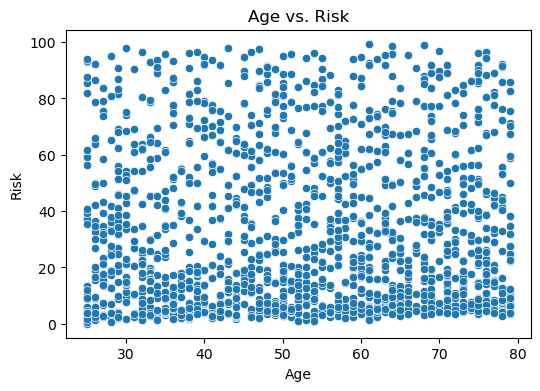

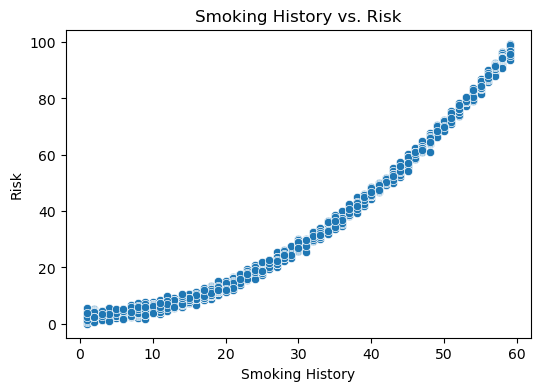

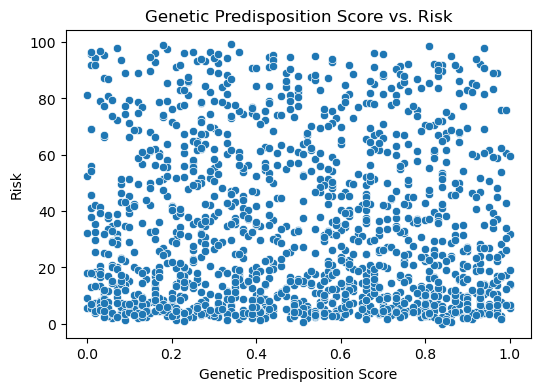

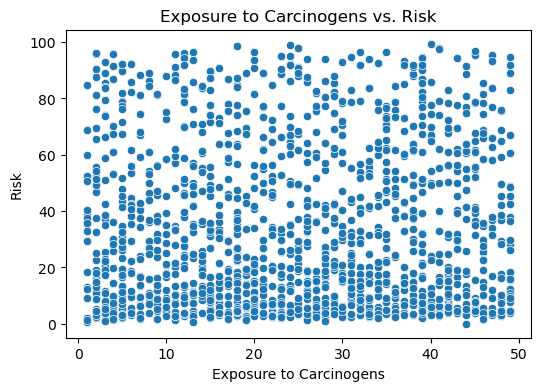

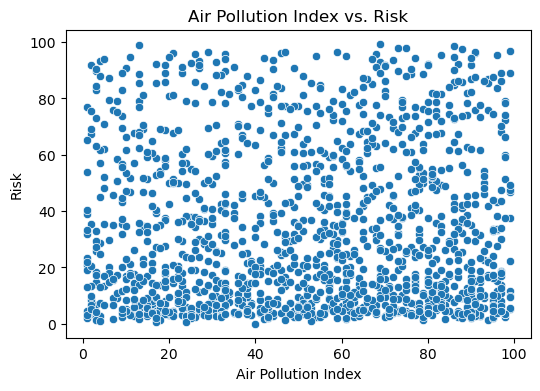

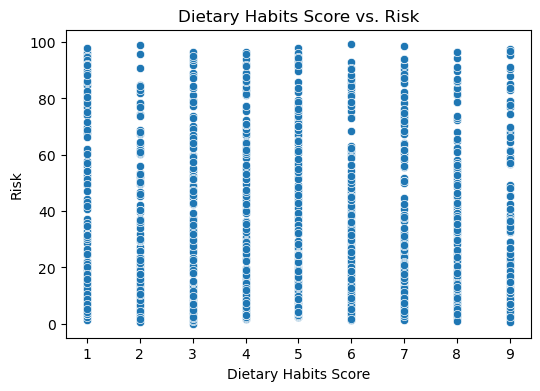

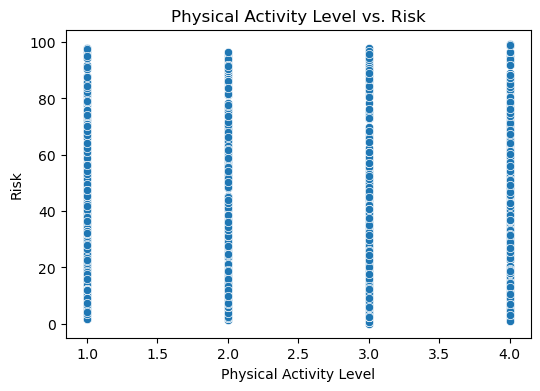

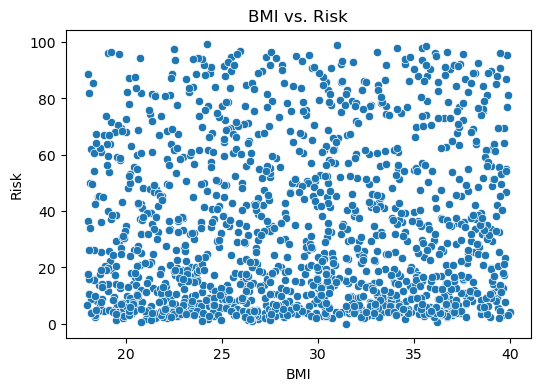

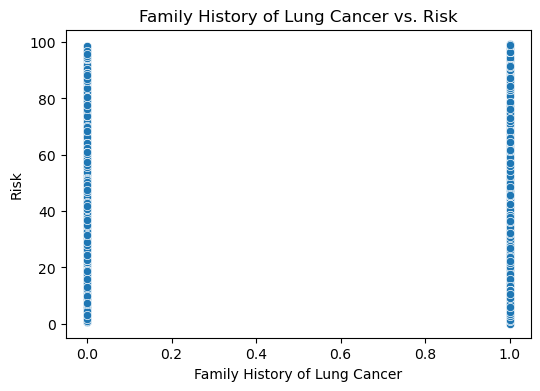

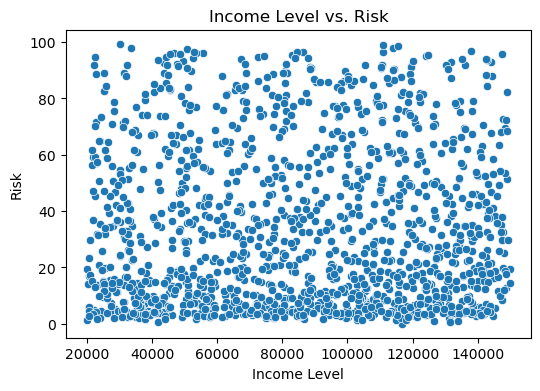

In [22]:
for column in df_xtrain.columns[1:]:  
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train_data, x=column, y='Risk')
    plt.title(f'{column} vs. Risk')
    plt.xlabel(column)
    plt.ylabel('Risk')
    plt.show()

# Overview of Features 

Most features are either integer or float, suggesting numerical data that may represent either continuous or discrete variables

Specific features such as Smoking History, Exposure to Carcinogens, Air Pollution Index, Dietary Habits Score, Physical Activity Level, Family History of Lung Cancer and Income Level appear to be encoded in a manner that suggest they could be categorical or ordinal in nature but represented numerically

# Summary

Age, BMI, GEnetic Predisposition Score and Income Level are continuous variables with a range of values.

Other features, though numerical, might represent categorical or ordinal scales, given their description and the nature of the data. example is Smoking History which ranges from 1 to 59 possibly encoded categorical variable

There are no missing values, which simplifies the preprocessing stage

Target Variable (RISK)
The target variable 'Risk' is continuous, with values ranging from 0 to 99.45. The mean risk score is approximately 33.9, with a standard deviation of about 28.1. This distribution suggests a wide variance in cancer risk across the dataset.

# Training using Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Continuous features
continuous_features = ['Age', 'Genetic Predisposition Score', 'BMI', 'Income Level']

# Standardizing continuous features in x_train
scaler = StandardScaler()
x_train_scaled = df_xtrain.copy()
x_train_scaled[continuous_features] = scaler.fit_transform(x_train_scaled[continuous_features])

# Separating the target variable
y = df_ytrain['Risk']

# Splitting the training data for model validation
X_train, X_val, y_train, y_val = train_test_split(x_train_scaled.drop('Id', axis=1), y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))

# Displaying the RMSE 
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 6.809109771937657


# Training using Gradient Boosting Regressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))

print(f'Gradient Boosting Regressor RMSE: {rmse_gb}')

Gradient Boosting Regressor RMSE: 0.8817105098609125


# Gradient Boosting Vs Linear Regressor 

The Gradient Boosting Regressor significantly outperforms the Linear Regression model, suggesting that the complexity and non-linear relationships within the data is better captured by Gradient Boosting.

Given the superior performance of the Gradient Boosting Regressor, it is used for prediction on the test dataset

# Testing Data

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# List of continuous features identified previously
continuous_features = ['Age', 'Genetic Predisposition Score', 'BMI', 'Income Level']

# Scaling continuous features in the test dataset
test_scaled = df_test.copy()  
test_scaled[continuous_features] = scaler.transform(test_scaled[continuous_features])

# Dropping the 'Id' column for prediction purposes
test_features = test_scaled.drop('Id', axis=1)

# Generating predictions using the Gradient Boosting Regressor
test_predictions = gb_model.predict(test_features)

# Creating a DataFrame for the predictions along with the Id
predictions_df = pd.DataFrame({'Id': df_test['Id'], 'Risk': test_predictions})


# Displaying the first few rows of the predictions DataFrame
print(predictions_df.head())

     Id       Risk
0  1401   3.428246
1  1402  96.579319
2  1403   3.184749
3  1404  24.422104
4  1405   4.543203


# Saving the DataFrame to a CSV file

In [26]:
# Save the DataFrame to a CSV file for upload on Kaggle
predictions_df.to_csv('/Users/samuelattakorah/Documents/Master ML/Final Project/lung_cancer_risk_predictions.csv', index=False)

print("Predictions saved to 'lung_cancer_risk_predictions.csv'")


Predictions saved to 'lung_cancer_risk_predictions.csv'


GridSearchCV : It exhaustively generates candidated from a grid of parameter values specified with the param_grid parameter

In [28]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


continuous_features = ['Age', 'Genetic Predisposition Score', 'BMI', 'Income Level']

# Standardizing continuous features in x_train
scaler = StandardScaler()
x_train_scaled = df_xtrain.copy()
x_train_scaled[continuous_features] = scaler.fit_transform(x_train_scaled[continuous_features])

# Separating the target variable
y = df_ytrain['Risk']

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.6, 0.8, 1.0]
}

# Create a base model
gb = GradientBoostingRegressor()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(x_train_scaled.drop('Id', axis=1), y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_gb = grid_search.best_estimator_


# Predictions with the best model
y_pred = best_gb.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)  
print("RMSE: ", rmse)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END le

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END le

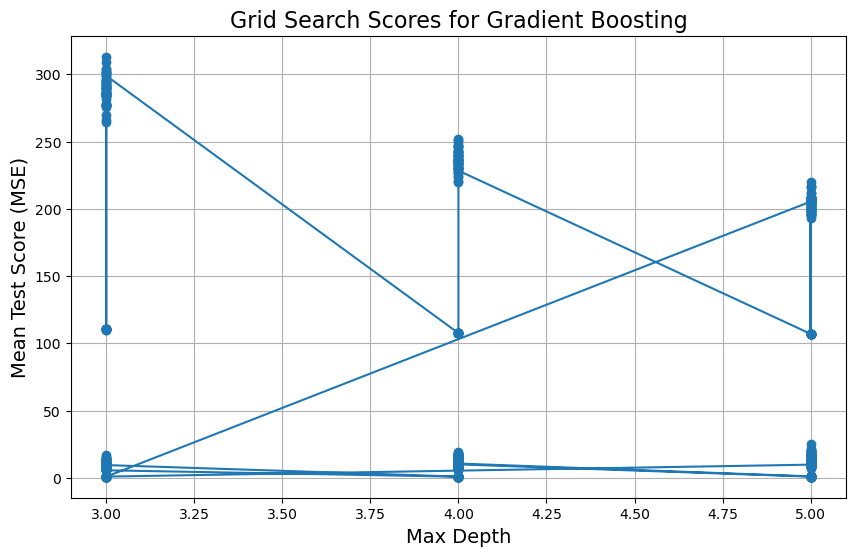

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

results['mean_test_score'] = -results['mean_test_score']

# Plotting the scores for each hyperparameter for the model with the best 'n_estimators'
best_n_estimators = grid_search.best_params_['n_estimators']
results_filtered = results[results['param_n_estimators'] == best_n_estimators]

plt.figure(figsize=(10, 6))
plt.plot(results_filtered['param_max_depth'], results_filtered['mean_test_score'], marker='o')

plt.title('Grid Search Scores for Gradient Boosting', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Mean Test Score (MSE)', fontsize=14)
plt.grid(True)
plt.show()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model with the best hyperparameters
gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    subsample=0.6,
    random_state=42
)

# Fit the model
gb_model.fit(X_train, y_train)

# Generating predictions using the Gradient Boosting Regressor
test_predictions = gb_model.predict(test_features)

# Creating a DataFrame for the predictions along with the Id
predictions_df = pd.DataFrame({'Id': df_test['Id'], 'Risk': test_predictions})


# Displaying the first few rows of the predictions DataFrame
print(predictions_df.head())

     Id       Risk
0  1401   3.726105
1  1402  96.593869
2  1403   3.209224
3  1404  24.438094
4  1405   4.450457


In [19]:
# Save the updated results
predictions_df.to_csv('/Users/samuelattakorah/Documents/Master ML/Final Project/lung_cancer_risk_predictions_update.csv', index=False)

print("Predictions saved to 'lung_cancer_risk_predictions.csv'")


Predictions saved to 'lung_cancer_risk_predictions.csv'
